In [2]:
import sympy as sym
import numpy as np
from sympy import pi, latex
from sympy.printing.mathml import mathml

import operator
import ipywidgets as widgets
from IPython.display import display, Latex, display_jpeg, Math, Markdown
sym.init_printing(use_latex=True) 

check_equation = lambda eq1, eq2: sym.simplify(eq1-eq2) == 0

def check_answer(variable_name, expected, comparison = operator.eq):
    output = widgets.Output()
    button = widgets.Button(description="Check answer")
    def _inner_check(button):
        with output:
            if comparison(globals()[variable_name], expected):
                output.outputs = [{'name': 'stdout', 'text': 'Correct!',
                                   'output_type': 'stream'}]
            else:
                output.outputs = [{'name': 'stdout', 'text': 'Incorrect!',
                                   'output_type': 'stream'}]
    button.on_click(_inner_check)
    display(button, output)

# SymPy

SymPy is a Python library for symbolic mathematics. You can use it as a tool to evaluate basic and complicated math operations, whenever they become tedious or error prone.

```{custom_download_link} ./sympy_stripped.ipynb
:replace_default: "True"
```


For example, SymPy is able to solve the differential equation $y'' - y = e^t$ for you!

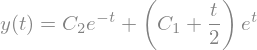

In [3]:
import sympy as sym
y = sym.Function('y')
t = sym.symbols('t')
sym.dsolve(sym.Eq(y(t).diff(t, t) - y(t), sym.exp(t)), y(t))

On this page, you'll get an introduction of the SymPy-basics. This introduction is derived from the introduction into SymPy from Jason Moore (CC-BY licensed) {cite}`jason_moore` and the SymPy Tutorial (Copyright (c) 2006-2023 SymPy Development Team) {cite}`sympy_why`.


## Why SymPy?
... and not Wolfram Alpha, Mathematica, Maple, GeoGebra, your fancy calculator, or ...?

> First off, SymPy is completely free. It is open source, and licensed under the liberal BSD license, so you can modify the source code and even sell it if you want to. This contrasts with popular commercial systems like Maple or Mathematica that cost hundreds of dollars in licenses.
>
> Second, SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy. SymPy is written entirely in Python, and is executed entirely in Python. This means that if you already know Python, it is much easier to get started with SymPy, because you already know the syntax (and if you don’t know Python, it is really easy to learn). We already know that Python is a well-designed, battle-tested language. The SymPy developers are confident in their abilities in writing mathematical software, but programming language design is a completely different thing. By reusing an existing language, we are able to focus on those things that matter: the mathematics.
>
> Another computer algebra system, Sage also uses Python as its language. But Sage is large, with a download of over a gigabyte. An advantage of SymPy is that it is lightweight. In addition to being relatively small, it has no dependencies other than Python, so it can be used almost anywhere easily. Furthermore, the goals of Sage and the goals of SymPy are different. Sage aims to be a full featured system for mathematics, and aims to do so by compiling all the major open source mathematical systems together into one. When you call some function in Sage, such as integrate, it calls out to one of the open source packages that it includes. In fact, SymPy is included in Sage. SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.
>
> A final important feature of SymPy is that it can be used as a library. Many computer algebra systems focus on being usable in interactive environments, but if you wish to automate or extend them, it is difficult to do. With SymPy, you can just as easily use it in an interactive Python environment or import it in your own Python application. SymPy also provides APIs to make it easy to extend it with your own custom functions.
{cite}`sympy_why`

## First steps

Let’s take an example. Say we wanted to use the built-in Python functions to compute square roots. We might do something like this:

In [4]:
import math
math.sqrt(8)

Here we got an approximate result, which is not the exact square root of 8. If all we cared about was the decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that $\sqrt{8} = \sqrt{ 4 \cdot 2} = 2 \sqrt{2}$
. We would have a hard time deducing this from the above result. This is where symbolic computation comes in. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left unevaluated by default

We'll import SymPy as follows:

In [5]:
import sympy as sym

Since SymPy works with mathematical symbols it's nice to view SymPy objects in
a format that is similar to the math in a textbook. Executing
`sym.init_printing()` at the beginning
of your Jupyter Notebook will ensure that SymPy objects render as typeset
mathematics.

In [4]:
sym.init_printing() 

Now we can apply SymPy to our simple root problem:

In [6]:
sym.sqrt(8)